In [1]:
import time
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from citipy import citipy

from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

73.1261961353257 -157.06852528860128
72.85387705862442 78.76096236215511
70.23827917250878 -135.83275023271577
54.63266295132871 -80.98665039481938
-88.92062254663745 156.24244052714994
-41.76287202633527 77.32006252146016
9.07780191434155 95.7817580122603
36.17893834473492 -52.96767761347668
-84.93737814672278 97.81857971312326
-54.61484512777383 -128.4887390215007
81.0214835420621 -100.01430948734081
58.337815540297015 95.46870652520221
-81.33129953392441 17.346949037898128
-70.0588867654436 27.878168227219987
-71.52046172031498 159.7794748107462
-6.664026666547329 22.870397660064555
-32.40165558981547 64.59372435771687
61.14220308314336 -35.49119753024786
44.61224832668708 12.690252247012523
-79.95211120079883 -116.40074172900034
-63.89253523631339 9.576469521035165
21.48410686138763 -52.60169935497852
1.7035475278462116 -98.9765221920632
-23.71927437085617 38.90458612780296
32.8973642579419 18.56861391906429
-82.16922020579096 37.38710657832374
-30.817657523356928 -88.1163255045165

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
# Create an empty list to hold the weather data.
city_data = []
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | aklavik
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | kathu
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | motygino
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | dibaya
City not found. Skipping...
Processing Record 16 of Set 1 | souillac
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | porto tolle
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | codrington
Processing Record 22 

Processing Record 39 of Set 4 | provideniya
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | vostok
Processing Record 42 of Set 4 | isiro
Processing Record 43 of Set 4 | fortuna
Processing Record 44 of Set 4 | hilo
Processing Record 45 of Set 4 | baherden
Processing Record 46 of Set 4 | kodiak
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | gamba
Processing Record 50 of Set 4 | buariki
City not found. Skipping...
Processing Record 1 of Set 5 | nome
Processing Record 2 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 5 | karaul
City not found. Skipping...
Processing Record 4 of Set 5 | sterling
Processing Record 5 of Set 5 | nikolskoye
Processing Record 6 of Set 5 | sainte-thecle
Processing Record 7 of Set 5 | bargal
City not found. Skipping...
Processing Record 8 of Set 5 | puerto narino
Processing Record 9 of Set 5 | pokhvistnevo
Processing Record 10 of Set 5

Processing Record 28 of Set 8 | akhmim
Processing Record 29 of Set 8 | nagorsk
Processing Record 30 of Set 8 | eyl
Processing Record 31 of Set 8 | wazzan
City not found. Skipping...
Processing Record 32 of Set 8 | los llanos de aridane
Processing Record 33 of Set 8 | bandarbeyla
Processing Record 34 of Set 8 | turkistan
Processing Record 35 of Set 8 | klaksvik
Processing Record 36 of Set 8 | santa rosa
Processing Record 37 of Set 8 | gizo
Processing Record 38 of Set 8 | clyde river
Processing Record 39 of Set 8 | mangaratiba
Processing Record 40 of Set 8 | fukuma
Processing Record 41 of Set 8 | melendugno
Processing Record 42 of Set 8 | port arthur
Processing Record 43 of Set 8 | bathsheba
Processing Record 44 of Set 8 | arman
Processing Record 45 of Set 8 | isangel
Processing Record 46 of Set 8 | svetlyy
Processing Record 47 of Set 8 | simao
Processing Record 48 of Set 8 | namatanai
Processing Record 49 of Set 8 | abu kamal
Processing Record 50 of Set 8 | yen bai
Processing Record 1 o

Processing Record 13 of Set 12 | sitka
Processing Record 14 of Set 12 | miracema do tocantins
Processing Record 15 of Set 12 | bratsk
Processing Record 16 of Set 12 | chute-aux-outardes
Processing Record 17 of Set 12 | guanica
Processing Record 18 of Set 12 | puerto quijarro
Processing Record 19 of Set 12 | progreso
Processing Record 20 of Set 12 | kommunisticheskiy
Processing Record 21 of Set 12 | miri
Processing Record 22 of Set 12 | aktash
Processing Record 23 of Set 12 | mecca
Processing Record 24 of Set 12 | gilgil
City not found. Skipping...
Processing Record 25 of Set 12 | hidalgo
Processing Record 26 of Set 12 | sabha
Processing Record 27 of Set 12 | baiyin
Processing Record 28 of Set 12 | sao miguel do araguaia
Processing Record 29 of Set 12 | muzhi
Processing Record 30 of Set 12 | mancio lima
Processing Record 31 of Set 12 | salalah
Processing Record 32 of Set 12 | eureka
Processing Record 33 of Set 12 | kingman
Processing Record 34 of Set 12 | fort saint john
City not found.

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-10-29 21:42:13,71.2906,-156.7887,267.16,93,100,9.77
1,Dikson,RU,2022-10-29 21:42:14,73.5069,80.5464,264.41,94,100,4.35
2,Aklavik,CA,2022-10-29 21:42:15,68.2191,-135.0107,264.15,86,100,1.03
3,Bluff,NZ,2022-10-29 21:42:17,-46.6000,168.3333,291.93,59,92,6.97
4,Mahebourg,MU,2022-10-29 21:42:18,-20.4081,57.7000,295.31,88,20,1.03
5,Kathu,TH,2022-10-29 21:42:19,7.9178,98.3332,301.34,87,42,3.86
6,Saint-Pierre,RE,2022-10-29 21:42:20,-21.3393,55.4781,294.21,60,0,2.06
7,Albany,US,2022-10-29 21:41:28,42.6001,-73.9662,287.53,46,0,0.85
8,Rikitea,PF,2022-10-29 21:42:21,-23.1203,-134.9692,296.52,76,97,2.57
9,Yellowknife,CA,2022-10-29 21:38:44,62.4560,-114.3525,270.44,86,100,4.12


In [8]:
# Create the output file (CSV).
output_data_file = "Weather_Database/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

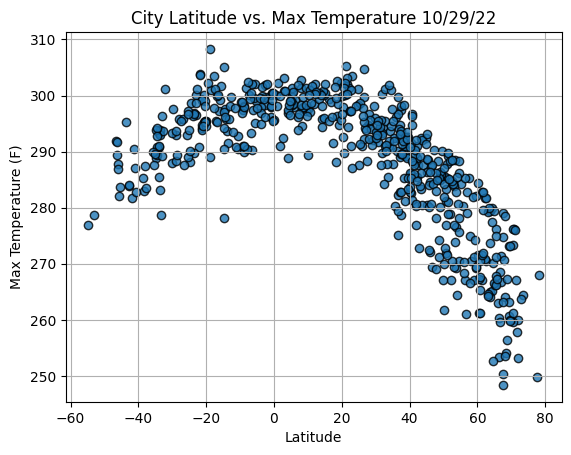

In [10]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Database/Fig1.png")

# Show plot.
plt.show()

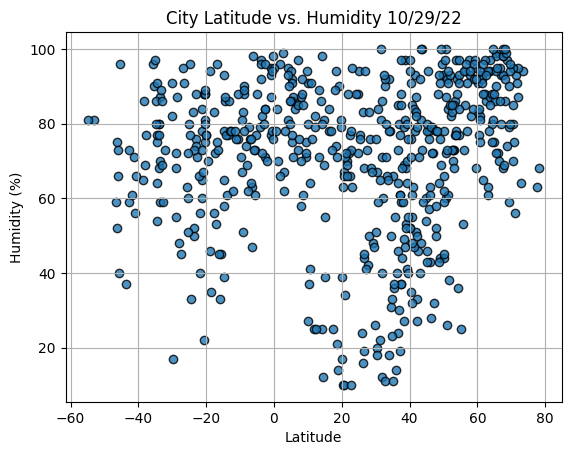

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather_Database/Fig2.png")
# Show plot.
plt.show()

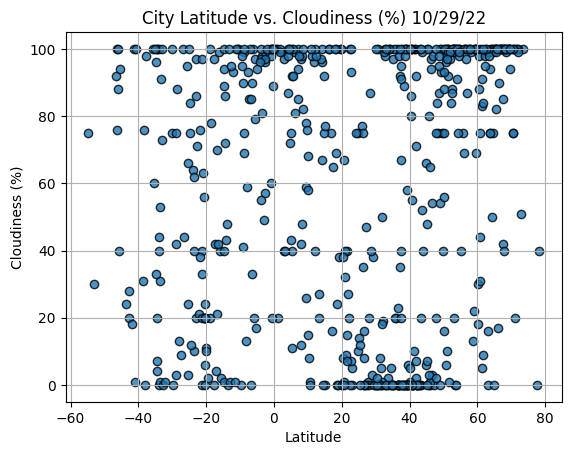

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather_Database/Fig3.png")
# Show plot.
plt.show()

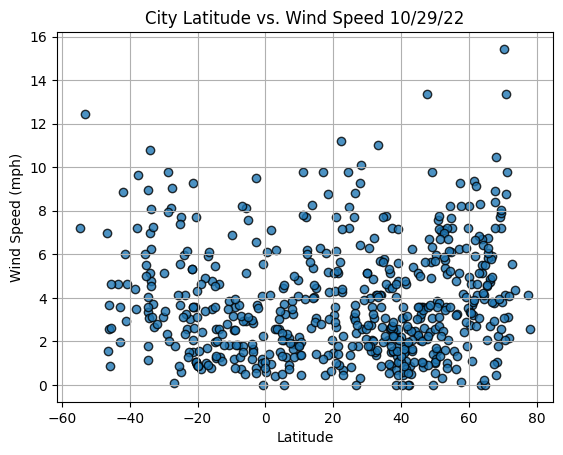

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather_Database/Fig4.png")
# Show plot.
plt.show()

In [14]:
# Import linregress
from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

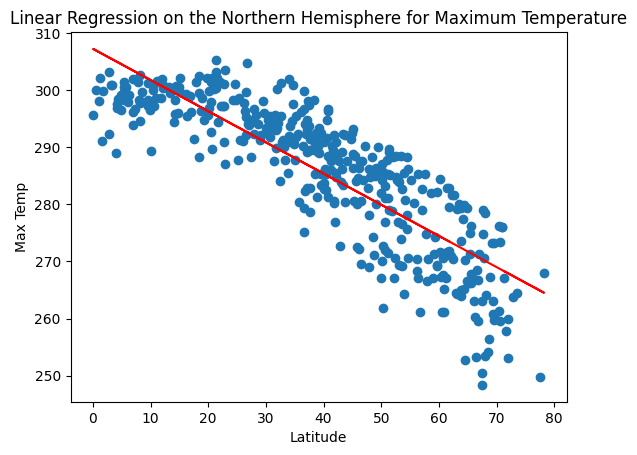

In [16]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10, 40))

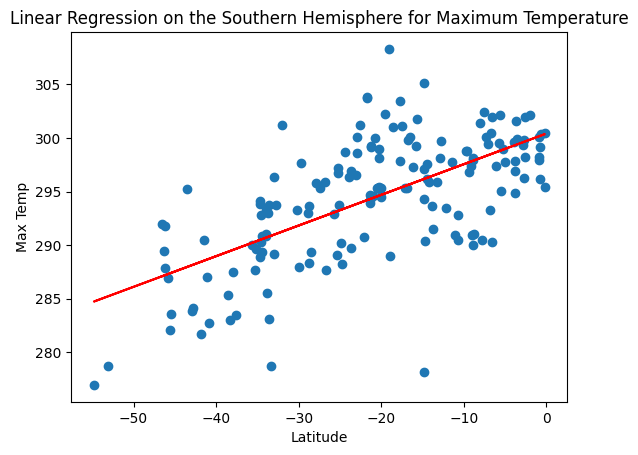

In [17]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (15, 18))

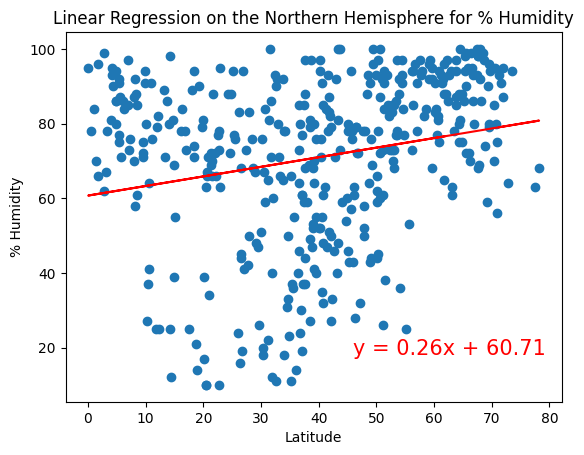

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (46, 18))

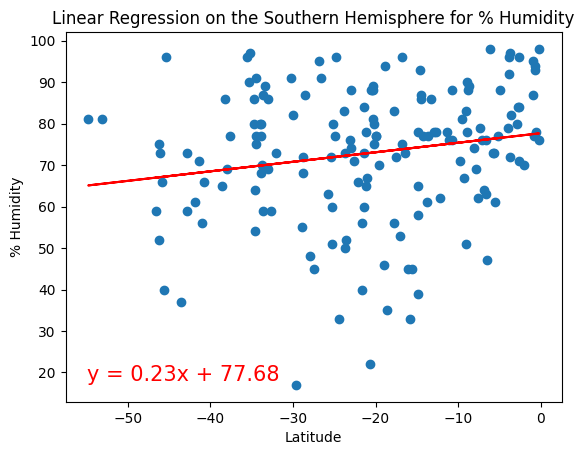

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-55, 18))

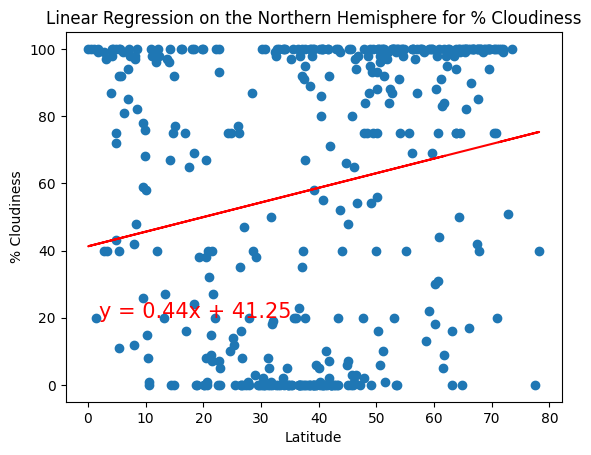

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (2, 20))

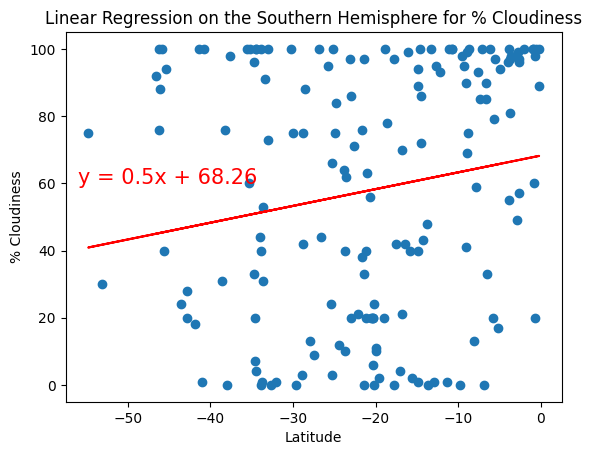

In [21]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-56, 60))

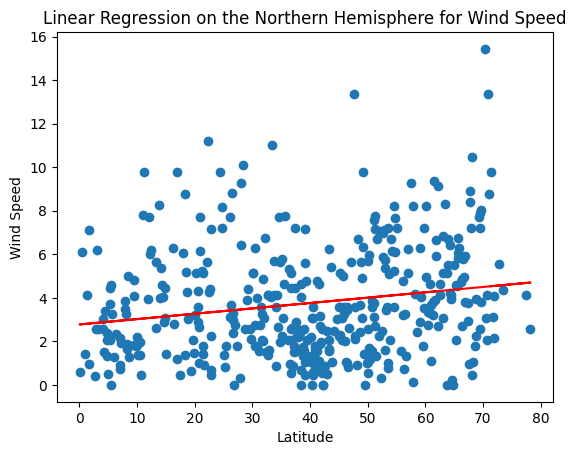

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed', (2, 20))

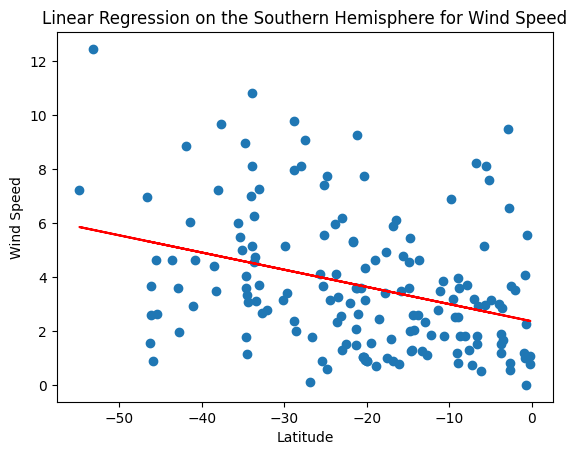

In [23]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed', (-50, 35))